In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pprint


## Part 1: Getting the Data
## get SVEN's portfolio




In [2]:
#######################
import myauz
from myauz.myalpha_funcs import (
    read_data,
    persist_data,
    update_csv,
    compose_portfolio,
    retrieveDF,
    string2date,
    retrievePF,
    initialize_df,
    time_sleep,
    create_path_list,
    refresh_db,
    get_daily_symbol,
)

#import importlib
#importlib.reload(myauz.myalpha_funcs)

from myauz.myalpha_libs_universal import StocksDb

import pprint


from datetime import date
import datetime
import pandas as pd



In [3]:
alphaDB = StocksDb()
alphaDB.check_path()
print("\n", alphaDB.api_key_alpha)


api_key_alpha = alphaDB.api_key_alpha
root_path = alphaDB.path
print('root_path: ',root_path)

read_from_alphavantage = False
rename_column = True


usecols = ["timestamp", "adjusted_close"]
startd = "2010-01-01"
endd = "2020-09-17"

print('usecols:', usecols)
print('startd',startd)
print('endd',endd)


Directory  ../data  already exists

 77K8XPSR3XWWZJ80
root_path:  ..
usecols: ['timestamp', 'adjusted_close']
startd 2010-01-01
endd 2020-09-17


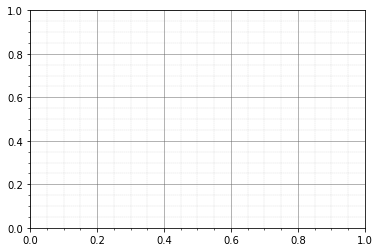

In [4]:
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')

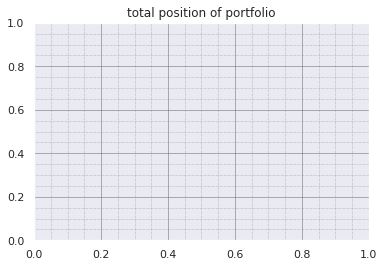

In [5]:
import seaborn as sns 
sns.set()
#sns.reset_orig
plt.figure()
plt.title("total position of portfolio")
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

In [6]:
#symbol_list = ["DHR", "GOOG"]

symbol_list = [
   "MSFT",
   "GOOG",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

path_list = create_path_list(symbol_list, root_path)
pprint.pprint(path_list)

bool_list_all = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

bool_list_high_tech = [
   True, #"MSFT", microsoft    
   True, #"GOOG", alphabet google      
#  True, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_industry = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   True, #"DHR", danaher
   True, #"EMR", emerson    
   True, #"ATR", aptargroup
   True, #"HXGBY", hexagon
   True, #"NVS", novartis
   True, #"NVZMY", novozymes    
   False, #"CL", colgate palmolive
   False, #"MCD", mcdonalds    
   False, #"HEINY", heineken
   False, #"LDSVF", lindt & spruengli    
]

bool_list_consumer = [
   False, #"MSFT", microsoft    
   False, #"GOOG", alphabet google      
#  False, #"AMZN", amazon
   False, #"DHR", danaher
   False, #"EMR", emerson    
   False, #"ATR", aptargroup
   False, #"HXGBY", hexagon
   False, #"NVS", novartis
   False, #"NVZMY", novozymes    
   True, #"CL", colgate palmolive
   True, #"MCD", mcdonalds    
   True, #"HEINY", heineken
   True, #"LDSVF", lindt & spruengli    
]

colors = [
    'magenta',
    'lime',
#   'tab:orange',
    'blue',
    'black',
    'slategrey',
    'tab:brown',
    'tab:olive',
    'darkviolet',
    'red',
    'turquoise',
    'forestgreen',
    'gold',
]

color_dict = dict(zip(symbol_list, colors))
print('\n')
print(color_dict)

{'ATR': '../data/ATR/daily_ATR.csv',
 'CL': '../data/CL/daily_CL.csv',
 'DHR': '../data/DHR/daily_DHR.csv',
 'EMR': '../data/EMR/daily_EMR.csv',
 'GOOG': '../data/GOOG/daily_GOOG.csv',
 'HEINY': '../data/HEINY/daily_HEINY.csv',
 'HXGBY': '../data/HXGBY/daily_HXGBY.csv',
 'LDSVF': '../data/LDSVF/daily_LDSVF.csv',
 'MCD': '../data/MCD/daily_MCD.csv',
 'MSFT': '../data/MSFT/daily_MSFT.csv',
 'NVS': '../data/NVS/daily_NVS.csv',
 'NVZMY': '../data/NVZMY/daily_NVZMY.csv'}


{'MSFT': 'magenta', 'GOOG': 'lime', 'DHR': 'blue', 'EMR': 'black', 'ATR': 'slategrey', 'HXGBY': 'tab:brown', 'NVS': 'tab:olive', 'NVZMY': 'darkviolet', 'CL': 'red', 'MCD': 'turquoise', 'HEINY': 'forestgreen', 'LDSVF': 'gold'}


In [7]:
#df[cols].plot(color = [color_dict.get(x, _) for x in df.columns])

# Full refresh of DB con time delay
# use refresh_db(root_path, api_key_alpha, symbol_list, False)


In [8]:
# importcsv data from alpha_vantage from scratch (everything since year 2000) and store it in data folder
#create a data folder
#example: import csv data for Procter&Gamble and SPY (etf which mimicks S&P 500 index)
#you alway need to import and store a symbol once you can work with its csv.
#if you don't the ticker symbol use alpha vantage for google sheets functionality (extension)
#after importing extension and registered you api_key use formula =AVSearchEquitySymbol("<some symbol_description")
#example: =AVSearchEquitySymbol("bayer") this will output for example the ticker-symbol: BAYN.DEX
"""
symbol_list_full_refresh= [
   "MSFT",
   "GOOG",    
   "AMZN",    
   "DHR",
   "EMR",
   "ATR",
   "HXGBY",
   "NVS",
   "NVZMY",    
   "CL",
   "MCD",    
   "HEINY",
   "LDSVF",  
]

symbol_list_full_refresh = ['NVZMY']
# persist_data(symbol_list_full_refresh, _dict, _path_list)
full_refresh_alphavantage = True

refresh_db(root_path, api_key_alpha, symbol_list_full_refresh)
"""


'\nsymbol_list_full_refresh= [\n   "MSFT",\n   "GOOG",    \n   "AMZN",    \n   "DHR",\n   "EMR",\n   "ATR",\n   "HXGBY",\n   "NVS",\n   "NVZMY",    \n   "CL",\n   "MCD",    \n   "HEINY",\n   "LDSVF",  \n]\n\nsymbol_list_full_refresh = [\'NVZMY\']\n# persist_data(symbol_list_full_refresh, _dict, _path_list)\nfull_refresh_alphavantage = True\n\nrefresh_db(root_path, api_key_alpha, symbol_list_full_refresh)\n'

In [9]:
### create dataframe with portfolio adjusted close
usecols = ["timestamp", "adjusted_close"]
pf = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf) 
pf.tail()

                MSFT     GOOG       DHR      EMR       ATR    HXGBY      NVS  \
2010-01-04   24.1710      NaN   27.4647  31.2824   30.6109      NaN  35.5451   
2010-01-05   24.1788      NaN   27.4318  31.3329   30.5771      NaN  35.5113   
2010-01-06   24.0304      NaN   27.4830  31.6144   31.0417      NaN  35.3830   
2010-01-07   23.7820      NaN   27.7096  31.6144   31.0417      NaN  35.0722   
2010-01-08   23.9445      NaN   28.0969  31.7948   31.0670      NaN  35.3559   
...              ...      ...       ...      ...       ...      ...      ...   
2020-09-10  205.3700  1532.02  203.0900  67.5100  117.1900  73.4300  88.5200   
2020-09-11  204.0300  1520.72  204.8700  67.9200  118.3600  74.6600  89.8800   
2020-09-14  205.4100  1519.28  207.9300  68.1900  119.0800  75.4694  90.0300   
2020-09-15  208.7800  1541.44  208.6900  68.4100  118.3300  75.5200  91.0000   
2020-09-16  205.0500  1520.90  207.0500  68.6800  117.7700  76.2800  89.8500   

              NVZMY       CL       MCD 

,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2020-09-10,205.37,1532.02,203.09,67.51,117.19,73.4300,88.52,63.730,76.41,217.24,45.445,8559.35
2020-09-11,204.03,1520.72,204.87,67.92,118.36,74.6600,89.88,65.590,76.75,218.00,45.420,8559.35
2020-09-14,205.41,1519.28,207.93,68.19,119.08,75.4694,90.03,65.275,77.15,220.56,45.990,8588.50
2020-09-15,208.78,1541.44,208.69,68.41,118.33,75.5200,91.00,65.220,76.94,222.37,46.030,8450.00
2020-09-16,205.05,1520.90,207.05,68.68,117.77,76.2800,89.85,65.980,76.91,224.81,45.650,8450.00


In [10]:
### create dataframe with volumes of portfolio
usecols = ["timestamp", "volume"]
pf_vol = retrievePF(symbol_list, path_list, startd, endd, usecols, rename_column)
print(pf_vol)

                  MSFT       GOOG        DHR        EMR       ATR    HXGBY  \
2010-01-04  38409100.0        NaN  1972200.0  3781000.0  250200.0      NaN   
2010-01-05  49749600.0        NaN  1706700.0  2707500.0  150300.0      NaN   
2010-01-06  58182400.0        NaN  1880500.0  4314700.0  400900.0      NaN   
2010-01-07  50559700.0        NaN  1663700.0  3085700.0  126000.0      NaN   
2010-01-08  51197400.0        NaN  2251200.0  3477500.0   79800.0      NaN   
...                ...        ...        ...        ...       ...      ...   
2020-09-10  35461514.0  1618557.0  2416048.0  2226976.0  253479.0  15302.0   
2020-09-11  33620073.0  1597087.0  1890488.0  2253642.0  124582.0   5747.0   
2020-09-14  30375768.0  1696589.0  1720913.0  2684342.0  129030.0   5911.0   
2020-09-15  21823942.0  1331082.0  1591507.0  2233592.0  125633.0   5916.0   
2020-09-16  26372464.0  1312299.0  1823578.0  3143617.0  232032.0   8991.0   

                   NVS    NVZMY         CL         MCD     HEIN

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

In [11]:
# filter columns(symbols) in dataframe  by bool_list(symbols = True - this is the _included list)
def pf_filtered(_pf, _startd, _included):
    if not (_startd):
        _startd = '2020-01-01'
    if _included is []:
        return _pf
    else: 
        return _pf.loc[startd:,_included]

from itertools import compress
def symbol_list_filtered(_symbol_list,_included):
    #filter the symbol_list
    #symbol_list_filtered = [i for indx,i in enumerate(symbol_list) if included[indx]]
    return list(compress(_symbol_list, _included))

def determine_earliest_notation(_pf):
    """
    input:
    ------
         portfolio - columns = symbol  - import also symbol_list
    
    output:
    -------
         dataframe with one row containing earliest notation in time of symbol in portfolio
    
    """
    _pf_tmp = _pf.copy()
    _pf_tmp.fillna(0, inplace=True)
    _symbol_list = list(_pf_tmp.columns)
    _df_aux_0 = _pf_tmp.iloc[0]
    
    for symbol in _symbol_list:
        _df_aux_0[symbol] = (_pf_tmp[_pf_tmp[symbol] > 0].iloc[0]).loc[symbol]  
    return _df_aux_0

In [12]:
 
df_aux = determine_earliest_notation(pf)
print(df_aux)

print('\n')

df_vol_aux = determine_earliest_notation(pf_vol)
print(df_vol_aux)

"""
print('\n something:')
_df_aux = pf.iloc[0]
_df_aux['MSFT'] = (pf[pf['MSFT'] > 0].iloc[0]).loc['MSFT']
_df_aux['GOOG'] = (pf[pf['GOOG'] > 0].iloc[0]).loc['GOOG']
_df_aux['HXGBY'] = (pf[pf['HXGBY'] > 0].iloc[0]).loc['HXGBY']
_df_aux['HEINY'] = (pf[pf['HEINY'] > 0].iloc[0]).loc['HEINY']
print(_df_aux)
#print(pf.iloc[0])
"""
    

MSFT       24.1710
GOOG      558.4600
DHR        27.4647
EMR        31.2824
ATR        30.6109
HXGBY      18.4434
NVS        35.5451
NVZMY      19.9437
CL         32.1313
MCD        45.7426
HEINY      29.4814
LDSVF    2096.4120
Name: 2010-01-04 00:00:00, dtype: float64


MSFT     38409100.0
GOOG        13100.0
DHR       1972200.0
EMR       3781000.0
ATR        250200.0
HXGBY         169.0
NVS      11128887.0
NVZMY        1079.0
CL        2437100.0
MCD       5839300.0
HEINY        1292.0
LDSVF          75.0
Name: 2010-01-04 00:00:00, dtype: float64


"\nprint('\n something:')\n_df_aux = pf.iloc[0]\n_df_aux['MSFT'] = (pf[pf['MSFT'] > 0].iloc[0]).loc['MSFT']\n_df_aux['GOOG'] = (pf[pf['GOOG'] > 0].iloc[0]).loc['GOOG']\n_df_aux['HXGBY'] = (pf[pf['HXGBY'] > 0].iloc[0]).loc['HXGBY']\n_df_aux['HEINY'] = (pf[pf['HEINY'] > 0].iloc[0]).loc['HEINY']\nprint(_df_aux)\n#print(pf.iloc[0])\n"

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

In [13]:
#startd_new = string2date('2020-07-01')
#endd_new = string2date('2020-08-01')


#startd = '2020-01-01'
included = bool_list_high_tech
#pf1 = pf.loc[startd:,:]
#pf1 = pf.loc[startd:,bool_list_consumer]
#pf1_vol = pf_vol.loc[startd:,:]
#pf1_vol = pf_vol.loc[startd:,bool_list_consumer]
pf1 = pf_filtered(pf,startd,included)
pf1_vol = pf_filtered(pf_vol,startd,included)

pprint.pprint(pf1.head(3))
print('\n')
pprint.pprint(pf1_vol.head(3))

               MSFT  GOOG
2010-01-04  24.1710   NaN
2010-01-05  24.1788   NaN
2010-01-06  24.0304   NaN


                  MSFT  GOOG
2010-01-04  38409100.0   NaN
2010-01-05  49749600.0   NaN
2010-01-06  58182400.0   NaN


In [14]:
pprint.pprint(color_dict)
print(pf.columns)

{'ATR': 'slategrey',
 'CL': 'red',
 'DHR': 'blue',
 'EMR': 'black',
 'GOOG': 'lime',
 'HEINY': 'forestgreen',
 'HXGBY': 'tab:brown',
 'LDSVF': 'gold',
 'MCD': 'turquoise',
 'MSFT': 'magenta',
 'NVS': 'tab:olive',
 'NVZMY': 'darkviolet'}
Index(['MSFT', 'GOOG', 'DHR', 'EMR', 'ATR', 'HXGBY', 'NVS', 'NVZMY', 'CL',
       'MCD', 'HEINY', 'LDSVF'],
      dtype='object')


darkviolet


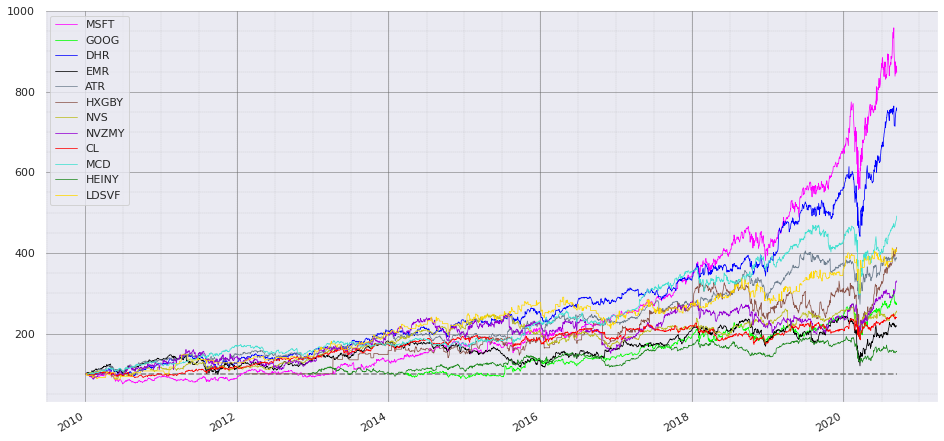

In [15]:
#print(pf.iloc[0])
#df_aux replaces pf.iloc[0]
print(color_dict.get('NVZMY'))

color_list = [color_dict.get(x, _) for x in pf.columns]



(pf / df_aux * 100).plot(color=color_list, figsize=(16, 8), linewidth=0.75)
plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2)

plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')


In [16]:
print(pf['NVZMY'].max())
print(pf['NVZMY'].idxmax())
#pf['2011-12-01':'2011-12-31']

65.98
2020-09-16 00:00:00


____

** Plot the Volume of stock traded each day.**

['MSFT',
 'GOOG',
 'DHR',
 'EMR',
 'ATR',
 'HXGBY',
 'NVS',
 'NVZMY',
 'CL',
 'MCD',
 'HEINY',
 'LDSVF']

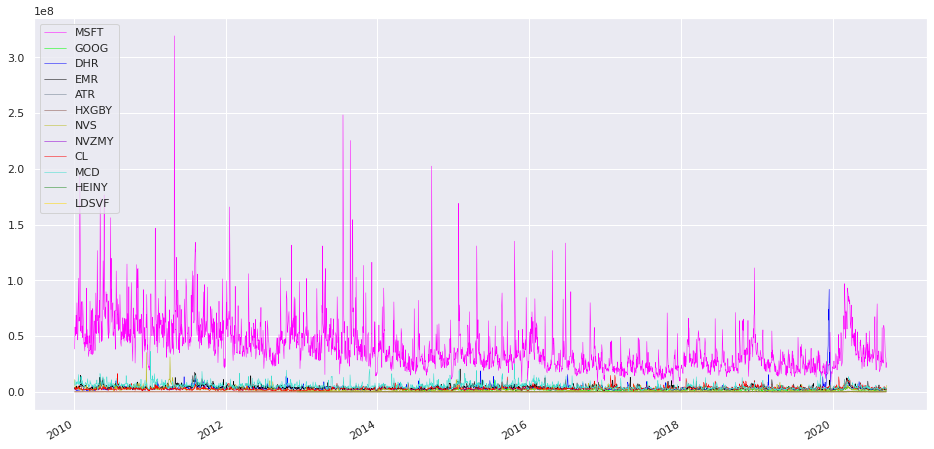

In [17]:
pf_vol.iloc[0]

(pf_vol).plot(color=color_list,figsize=(16, 8),linewidth=0.5)
plt.legend(loc=2);
list(pf_vol.columns)

In [18]:
print(pf_vol.max())
pf_vol.idxmax()

MSFT     319317900.0
GOOG      11164943.0
DHR       92051847.0
EMR       20572890.0
ATR        2431400.0
HXGBY       942309.0
NVS       35374520.0
NVZMY       809875.0
CL        16469500.0
MCD       36471600.0
HEINY      1534305.0
LDSVF         2000.0
dtype: float64


MSFT    2011-04-29
GOOG    2015-07-17
DHR     2019-12-16
EMR     2015-02-03
ATR     2012-05-31
HXGBY   2020-02-14
NVS     2010-12-15
NVZMY   2016-12-09
CL      2010-07-29
MCD     2011-01-04
HEINY   2015-10-29
LDSVF   2013-10-18
dtype: datetime64[ns]

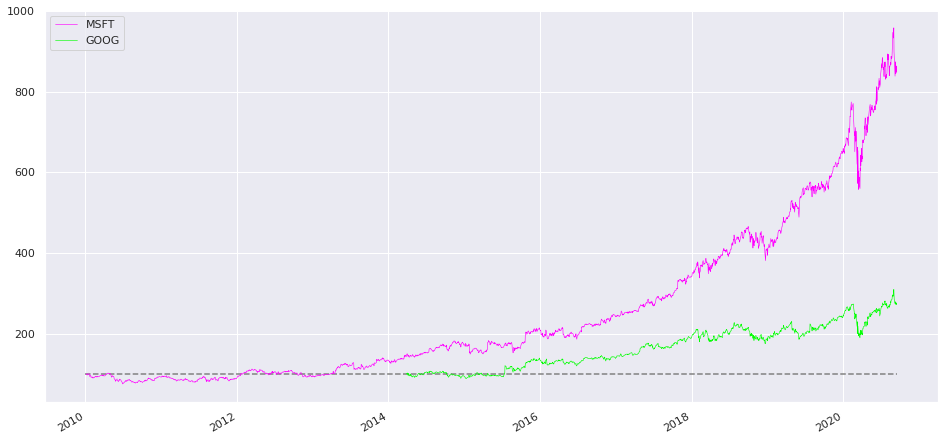

,MSFT,GOOG
2020-09-10,205.37,1532.02
2020-09-11,204.03,1520.72
2020-09-14,205.41,1519.28
2020-09-15,208.78,1541.44
2020-09-16,205.05,1520.90


In [19]:


#(pf1 / pf1.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))

(pf1 / df_aux[bool_list_high_tech] * 100).plot(color=color_list,figsize=(16, 8),linewidth=0.6)

plt.hlines(100, startd,endd,colors='gray', linestyles='--')
plt.legend(loc=2);
plt.show()
pf1.tail()


MSFT    26372464.0
GOOG     1312299.0
Name: 2020-09-16 00:00:00, dtype: float64


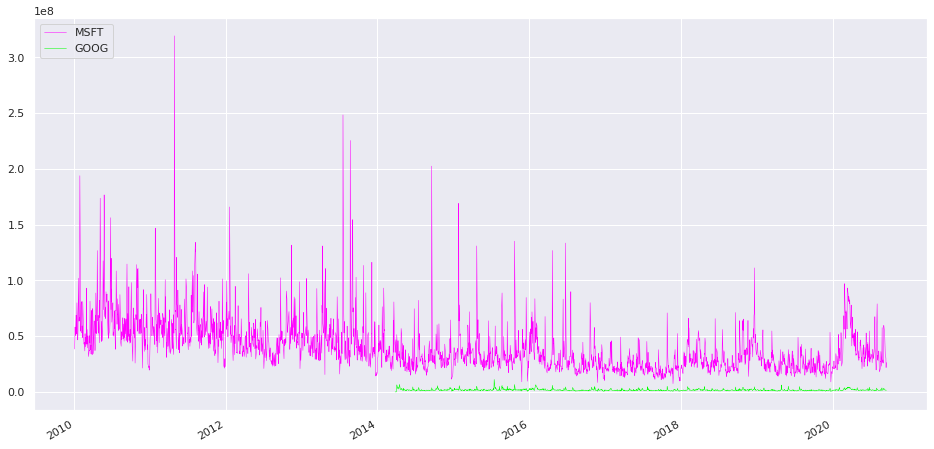

In [20]:
print(pf1_vol.iloc[-1])
(pf1_vol).plot(color=color_list,figsize=(16, 8),linewidth=0.5)

plt.legend(loc=2);

**Bonus: What happened that day? **

In [21]:
#rewrite retrieve

In [22]:
pf1_vol.max()

    

MSFT    319317900.0
GOOG     11164943.0
dtype: float64

In [23]:
pf1_vol.idxmax()

MSFT   2011-04-29
GOOG   2015-07-17
dtype: datetime64[ns]

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

MSFT     1.706148e+10
GOOG     7.513225e+09
DHR      1.389226e+10
EMR      1.016210e+09
ATR      1.133510e+08
HXGBY    5.522873e+07
NVS      1.460501e+09
NVZMY    3.959229e+07
CL       9.953571e+08
MCD      3.248731e+09
HEINY    6.539607e+07
LDSVF    8.001834e+06
total    2.567464e+10
dtype: float64
MSFT    2020-08-03
GOOG    2015-07-17
DHR     2019-12-16
EMR     2015-02-03
ATR     2014-01-17
HXGBY   2020-02-14
NVS     2010-12-15
NVZMY   2018-03-16
CL      2017-02-17
MCD     2019-11-04
HEINY   2015-10-29
LDSVF   2013-10-18
total   2020-02-28
dtype: datetime64[ns]


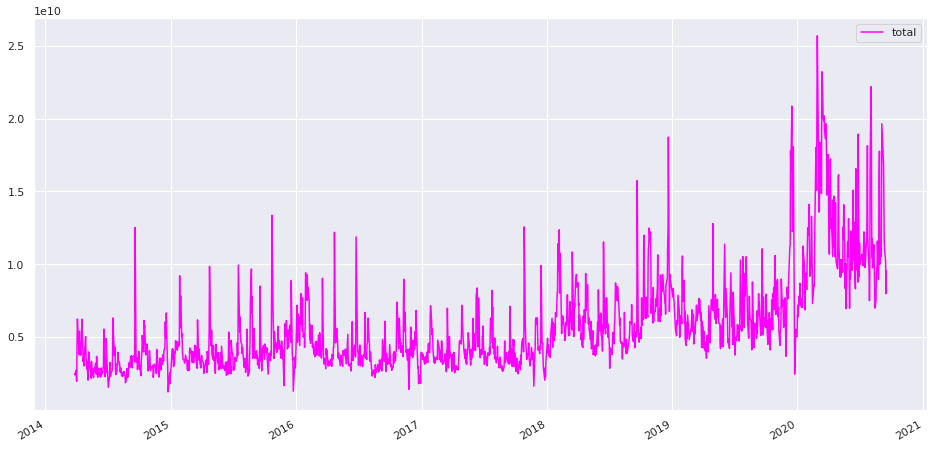

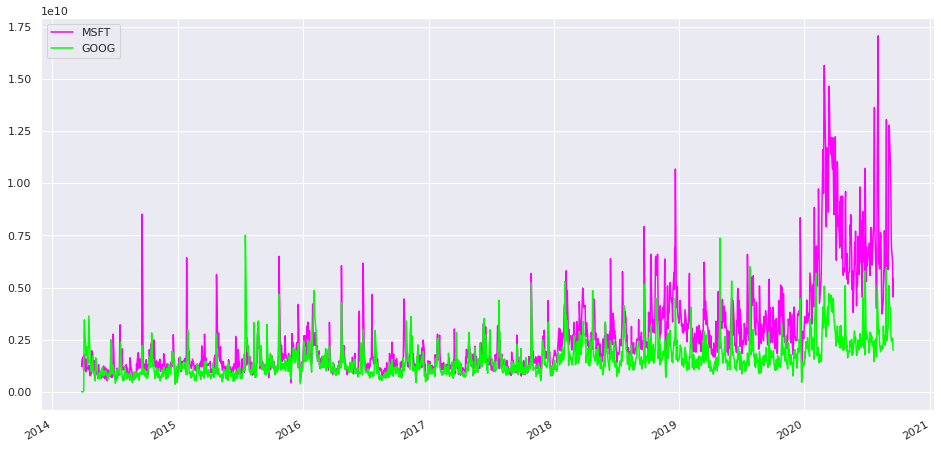

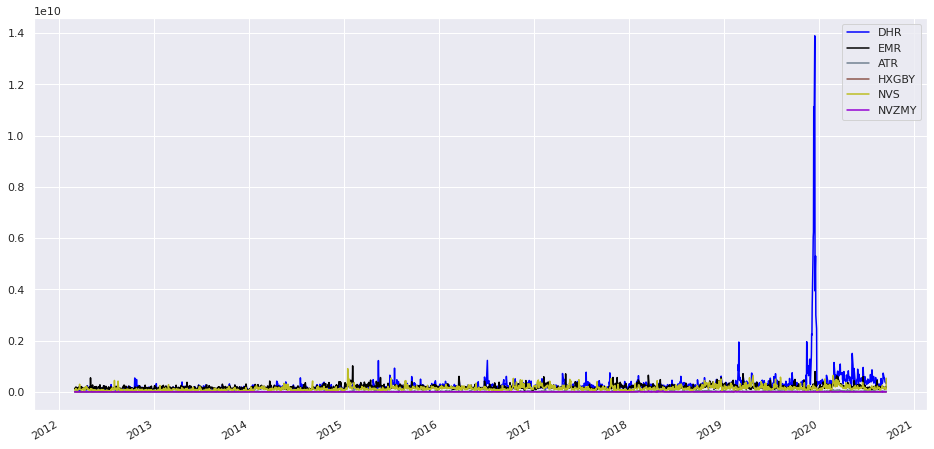

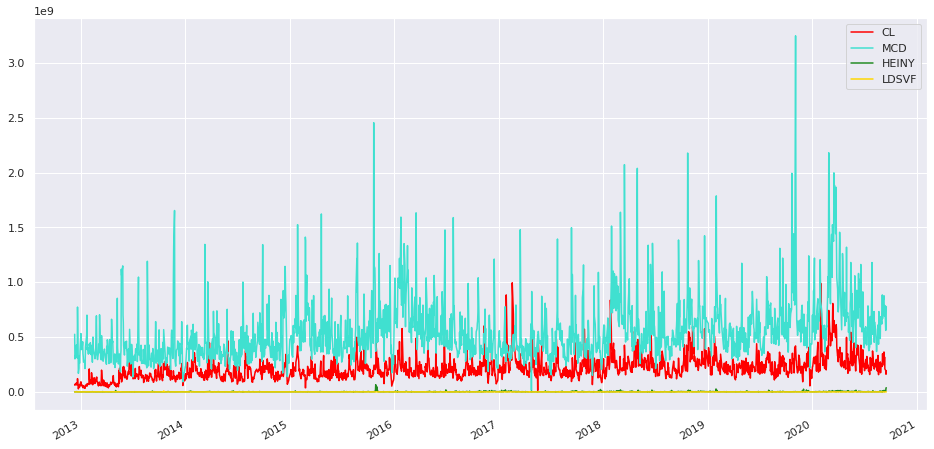

In [24]:
df_cap = initialize_df(symbol_list, startd, endd)

df_cap=(pf*pf_vol)
df_cap['total']=(pf*pf_vol).sum(axis=1)
df_cap.tail()
print(df_cap.max())
print(df_cap.idxmax())

df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap['total'].plot(color=color_list,figsize=(16,8))
plt.legend();


df_cap=pf1*pf1_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf2 = pf_filtered(pf,startd,bool_list_industry)
pf2_vol = pf_filtered(pf_vol,startd,bool_list_industry)
df_cap=pf2*pf2_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf2.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();


pf3 = pf_filtered(pf,startd,bool_list_consumer)
pf3_vol = pf_filtered(pf_vol,startd,bool_list_consumer)
df_cap=pf3*pf3_vol
df_cap.dropna(inplace=True)
#df_cap.plot.bar(figsize=(16,8))
color_list = [color_dict.get(x, _) for x in pf3.columns]
df_cap.plot(color=color_list,figsize=(16,8))
plt.legend();

** Plot this "Total Traded" against the time index.**

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

            MSFT  adj.close        MA20        MA50
2020-01-02     0   159.3574  153.758260  148.409508
2020-01-03     0   157.3731  154.193310  148.860202
2020-01-06     0   157.7799  154.644735  149.301828
2020-01-07     0   156.3413  154.933945  149.661288
2020-01-08     0   158.8316  155.367015  150.054930


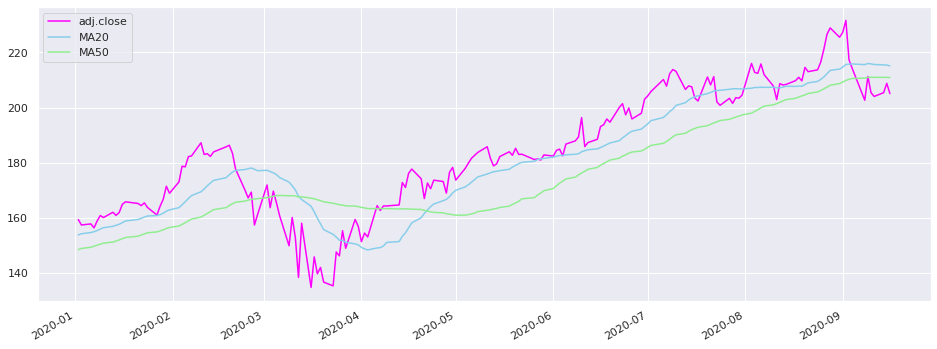

In [25]:
# Code here
MSFT = initialize_df(['MSFT'], '2020-01-01', endd)

MSFT['adj.close'] = pf['MSFT']
MSFT.dropna(inplace=True)
MSFT['MA20']=pf['MSFT'].rolling(window=20).mean()
MSFT['MA50']=pf['MSFT'].rolling(window=50).mean()
color_list = [color_dict.get(x, _) for x in pf.columns]
MSFT[['adj.close','MA20','MA50']].plot(color=['magenta','skyblue','lightgreen'],figsize=(16,6));
print(MSFT.head())


______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [26]:
#car_comp = pd.concat([tesla["open"],gm['open'],ford['open']], axis = 1)

#car_comp.columns = ['Tesla','GM','Ford']

#car_comp.head()

#scatter_matrix(car_comp,figsize=(8,8), alpha=0.2, hist_kwds={'bins':50});
# alpha - it is darker where points overlap

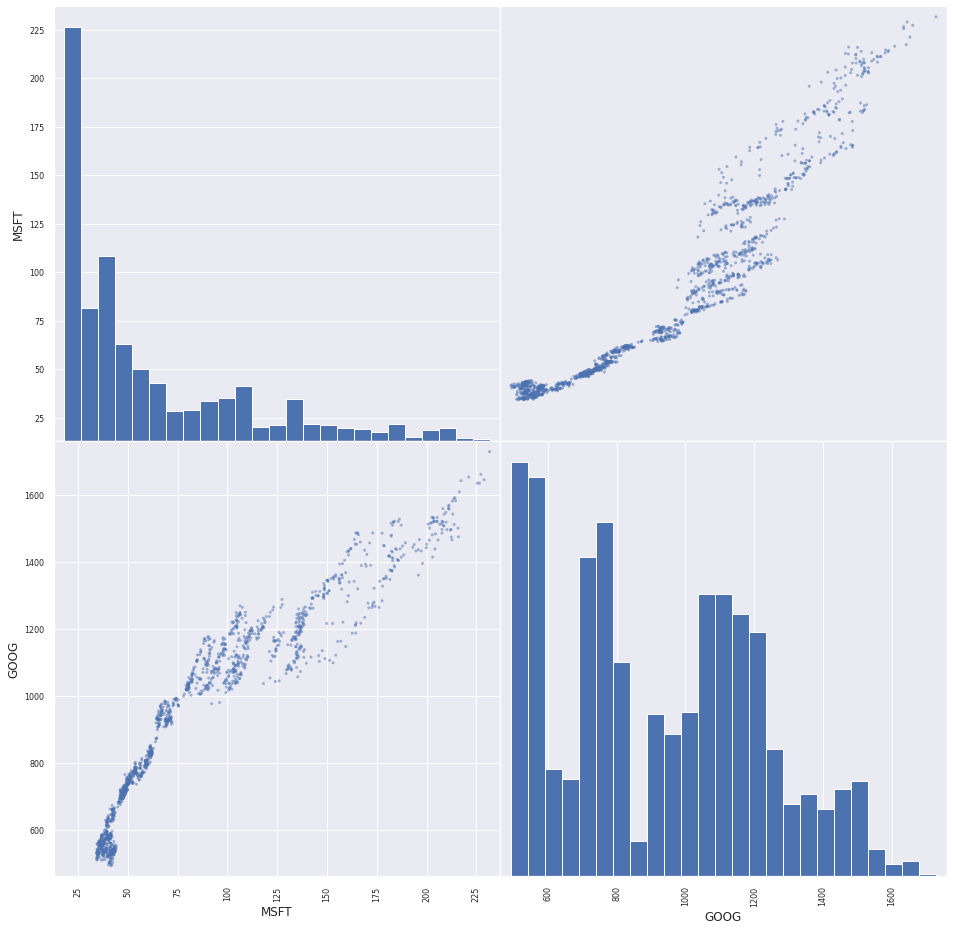

In [27]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(pf, figsize=(16,16),alpha=0.2, hist_kwds={'bins':25});

# alpha - it is darker where points overlap

from pandas.plotting import scatter_matrix
scatter_matrix(pf1, figsize=(16,16),alpha=0.5, hist_kwds={'bins':25});
# alpha - it is darker where points overlap

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [28]:
#tesla['returns'] = (tesla['close']/tesla['close'].shift(1))-1
#tesla.head()

In [29]:
#tesla['returns']=tesla['close'].pct_change(1)
#tesla.head()
#gm['returns']=gm['close'].pct_change(1)
#ford['returns']=ford['close'].pct_change(1)

In [30]:
df_returns = (pf/pf.shift(1))-1
#ret = pf.pct_change(1)
pprint.pprint(df_returns.head())

print('___________________')

df1_returns = pf_filtered(df_returns, startd, bool_list_high_tech)


print('\n high_tech:')
#df1_returns = (pf1/pf1.shift(1))-1
pprint.pprint(df1_returns.head(3))


print('\n industry:')
#df2_returns = (pf2/pf2.shift(1))-1
df2_returns = pf_filtered(df_returns, startd, bool_list_industry)
pprint.pprint(df2_returns.head(3))


print('\n consumer: ')
#df3_returns = (pf3/pf3.shift(1))-1
df3_returns = pf_filtered(df_returns, startd, bool_list_consumer)
pprint.pprint(df3_returns.head(3))



                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-05  0.000323   NaN -0.001198  0.001614 -0.001104    NaN -0.000951   
2010-01-06 -0.006138   NaN  0.001866  0.008984  0.015194    NaN -0.003613   
2010-01-07 -0.010337   NaN  0.008245  0.000000  0.000000    NaN -0.008784   
2010-01-08  0.006833   NaN  0.013977  0.005706  0.000815    NaN  0.008089   

               NVZMY        CL       MCD  HEINY     LDSVF  
2010-01-04       NaN       NaN       NaN    NaN       NaN  
2010-01-05  0.004066  0.008089 -0.007645    NaN -0.008482  
2010-01-06 -0.026532 -0.002275 -0.013643    NaN  0.008555  
2010-01-07  0.011547 -0.003961  0.007321    NaN  0.000000  
2010-01-08 -0.017806 -0.017953 -0.000969    NaN -0.038393  
___________________

 high_tech:
                MSFT  GOOG
2010-01-04       NaN   NaN
2010-01-05  0.000323   NaN
2010-01-06 -0.006138   NaN

 industry:
                 DHR    

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

In [31]:
#ford['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='forestgreen')
#tesla['returns'].hist(bins=50, figsize=(10,8), alpha=0.4, color='steelblue')
#gm['returns'].hist(bins=50, figsize=(10,8), alpha=0.2, color='darkorange');

In [32]:
#ford['returns'].plot(kind='kde', figsize=(10,8), label='Ford', color='forestgreen')
#tesla['returns'].plot(kind='kde', figsize=(10,8), label='Tesla', color='steelblue')
#gm['returns'].plot(kind='kde', figsize=(10,8), label='GM', color='darkorange');
#plt.legend();

In [33]:
#df_returns= pd.concat([tesla['returns'], ford['returns'], gm['returns']], axis=1)
#df_returns.columns = ['Tesla', 'Ford', 'GM']
#df_returns.plot(kind='box', figsize=(8,11))

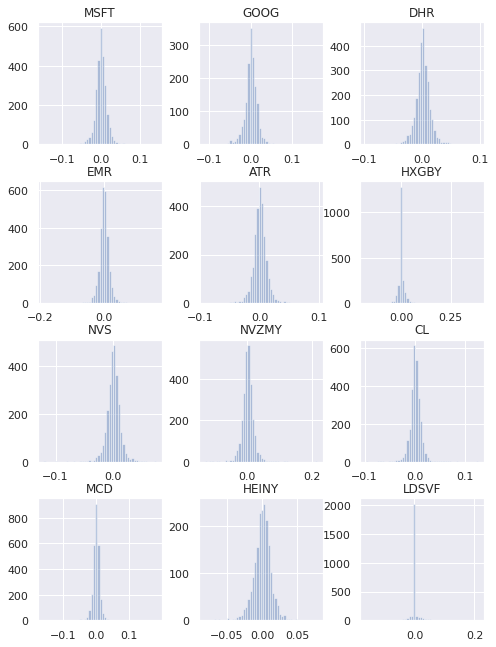

In [34]:
df_returns.hist(bins=50,figsize=(8,11),alpha=0.4);


                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-05  0.000323   NaN -0.001198  0.001614 -0.001104    NaN -0.000951   
2010-01-06 -0.006138   NaN  0.001866  0.008984  0.015194    NaN -0.003613   
2010-01-07 -0.010337   NaN  0.008245  0.000000  0.000000    NaN -0.008784   
2010-01-08  0.006833   NaN  0.013977  0.005706  0.000815    NaN  0.008089   

               NVZMY        CL       MCD  HEINY     LDSVF  
2010-01-04       NaN       NaN       NaN    NaN       NaN  
2010-01-05  0.004066  0.008089 -0.007645    NaN -0.008482  
2010-01-06 -0.026532 -0.002275 -0.013643    NaN  0.008555  
2010-01-07  0.011547 -0.003961  0.007321    NaN  0.000000  
2010-01-08 -0.017806 -0.017953 -0.000969    NaN -0.038393  


<Figure size 432x288 with 0 Axes>

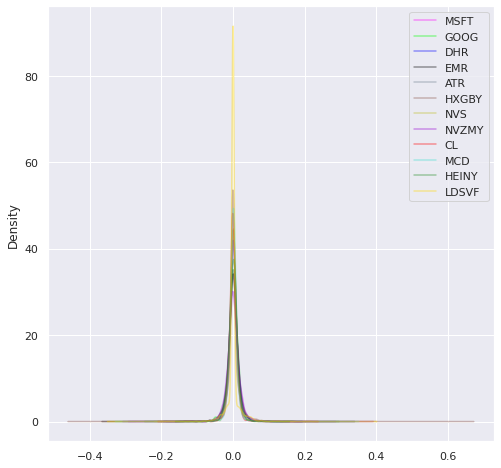

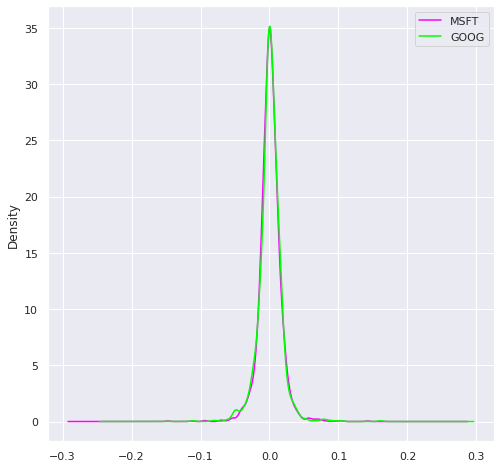

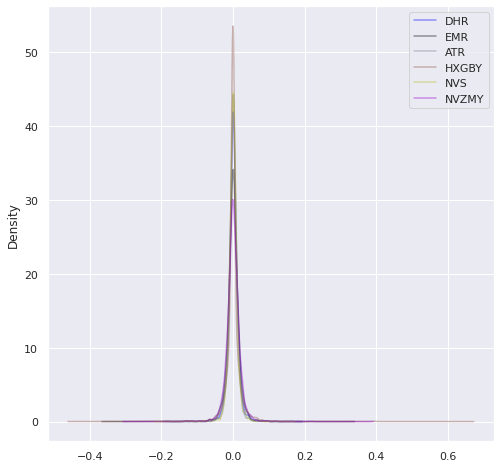

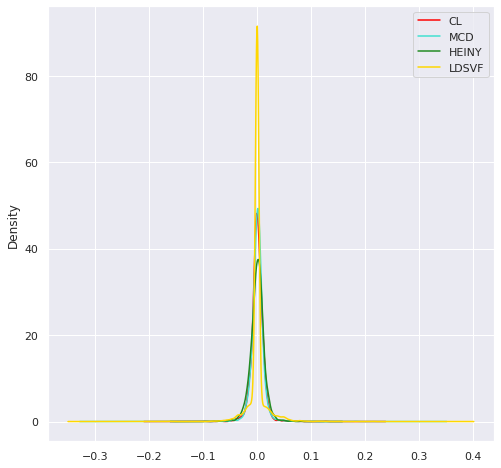

In [35]:
import seaborn as sns 
sns.set()

print(df_returns.head())

#sns.reset_orig
plt.figure()

color_list = [color_dict.get(x, _) for x in pf.columns]
df_returns.plot(kind='kde',color=color_list, figsize=(8,8), alpha=0.4)
plt.legend();

color_list = [color_dict.get(x, _) for x in pf1.columns]
df1_returns.plot(kind='kde',color = color_list, figsize=(8,8))
plt.legend();

color_list = [color_dict.get(x, _) for x in pf2.columns]
df2_returns.plot(kind='kde',color=color_list,figsize=(8,8), alpha=0.4)
plt.legend();

color_list = [color_dict.get(x, _) for x in pf3.columns]
df3_returns.plot(kind='kde',color=color_list, figsize=(8,8))
plt.legend();

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

** Try also creating some box plots comparing the returns. **

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

In [36]:
#pd.plotting.scatter_matrix(df_returns, figsize=(16,16), alpha= 0.4,hist_kwds={'bins':50});

** It looks like Google and Microsoft do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-05  0.000323   NaN -0.001198  0.001614 -0.001104    NaN -0.000951   
2010-01-06 -0.006138   NaN  0.001866  0.008984  0.015194    NaN -0.003613   
2010-01-07 -0.010337   NaN  0.008245  0.000000  0.000000    NaN -0.008784   
2010-01-08  0.006833   NaN  0.013977  0.005706  0.000815    NaN  0.008089   

               NVZMY        CL       MCD  HEINY     LDSVF  
2010-01-04       NaN       NaN       NaN    NaN       NaN  
2010-01-05  0.004066  0.008089 -0.007645    NaN -0.008482  
2010-01-06 -0.026532 -0.002275 -0.013643    NaN  0.008555  
2010-01-07  0.011547 -0.003961  0.007321    NaN  0.000000  
2010-01-08 -0.017806 -0.017953 -0.000969    NaN -0.038393  


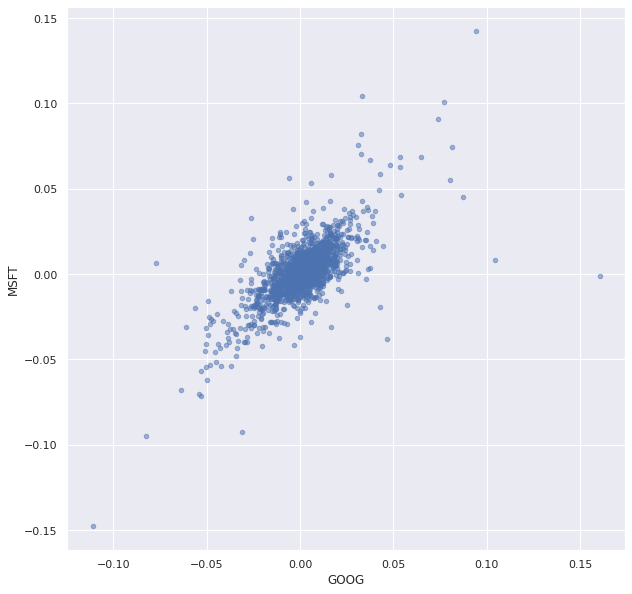

In [37]:
df_returns.plot(kind='scatter', x='GOOG', y='MSFT', alpha=0.5, figsize=(10,10));
print(df_returns.head())

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [38]:
#print(df_returns.head())
#tesla['returns']
#(1+tesla['returns'])
#(1+tesla['returns']).cumprod()
pprint.pprint(df1_returns['MSFT'])
print('\n')
(1+df1_returns['MSFT']).cumprod()

print(df_returns.head())

2010-01-04         NaN
2010-01-05    0.000323
2010-01-06   -0.006138
2010-01-07   -0.010337
2010-01-08    0.006833
                ...   
2020-09-10   -0.028018
2020-09-11   -0.006525
2020-09-14    0.006764
2020-09-15    0.016406
2020-09-16   -0.017866
Name: MSFT, Length: 2695, dtype: float64


                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-05  0.000323   NaN -0.001198  0.001614 -0.001104    NaN -0.000951   
2010-01-06 -0.006138   NaN  0.001866  0.008984  0.015194    NaN -0.003613   
2010-01-07 -0.010337   NaN  0.008245  0.000000  0.000000    NaN -0.008784   
2010-01-08  0.006833   NaN  0.013977  0.005706  0.000815    NaN  0.008089   

               NVZMY        CL       MCD  HEINY     LDSVF  
2010-01-04       NaN       NaN       NaN    NaN       NaN  
2010-01-05  0.004066  0.008089 -0.007645    NaN -0.008482  
2010-01-06 -0.026532 -0.002275 -0.013643    NaN  0.008555  
2

In [39]:
#tesla['cumRet']=(1+tesla['returns']).cumprod()
#tesla.head(10)
#gm['cumRet']=(1+gm['returns']).cumprod()
#ford['cumRet']=(1+ford['returns']).cumprod()

df_cum_returns = initialize_df(symbol_list, startd, endd)
df_cum_returns = (1+df_returns).cumprod()
df_cum_returns.head()

,MSFT,GOOG,DHR,EMR,ATR,HXGBY,NVS,NVZMY,CL,MCD,HEINY,LDSVF
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,1.000323,NaN,0.998802,1.001614,0.998896,NaN,0.999049,1.004066,1.008089,0.992355,NaN,0.991518
2010-01-06,0.994183,NaN,1.000666,1.010613,1.014073,NaN,0.995440,0.977426,1.005795,0.978816,NaN,1.000000
2010-01-07,0.983906,NaN,1.008917,1.010613,1.014073,NaN,0.986696,0.988713,1.001811,0.985982,NaN,1.000000
2010-01-08,0.990629,NaN,1.023019,1.016380,1.014900,NaN,0.994677,0.971109,0.983826,0.985027,NaN,0.961607


In [40]:
df1_cum_returns = initialize_df(symbol_list, startd, endd)
df1_cum_returns = (1+df1_returns).cumprod()
df1_cum_returns.head()



,MSFT,GOOG
2010-01-04,NaN,NaN
2010-01-05,1.000323,NaN
2010-01-06,0.994183,NaN
2010-01-07,0.983906,NaN
2010-01-08,0.990629,NaN


In [41]:
df2_cum_returns = initialize_df(symbol_list, startd, endd)
df2_cum_returns = (1+df2_returns).cumprod()
df2_cum_returns.head()

,DHR,EMR,ATR,HXGBY,NVS,NVZMY
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.998802,1.001614,0.998896,NaN,0.999049,1.004066
2010-01-06,1.000666,1.010613,1.014073,NaN,0.995440,0.977426
2010-01-07,1.008917,1.010613,1.014073,NaN,0.986696,0.988713
2010-01-08,1.023019,1.016380,1.014900,NaN,0.994677,0.971109


In [42]:
df3_cum_returns = initialize_df(symbol_list, startd, endd)
df3_cum_returns = (1+df3_returns).cumprod()
df3_cum_returns.head()

,CL,MCD,HEINY,LDSVF
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,1.008089,0.992355,NaN,0.991518
2010-01-06,1.005795,0.978816,NaN,1.000000
2010-01-07,1.001811,0.985982,NaN,1.000000
2010-01-08,0.983826,0.985027,NaN,0.961607


** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

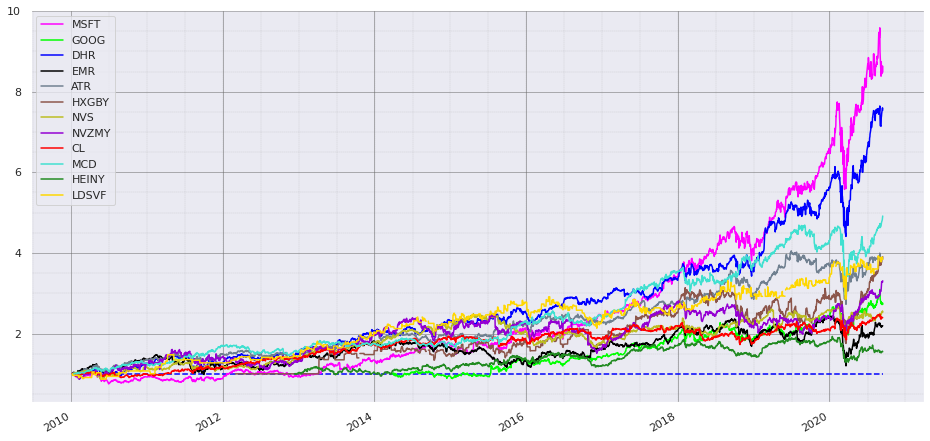

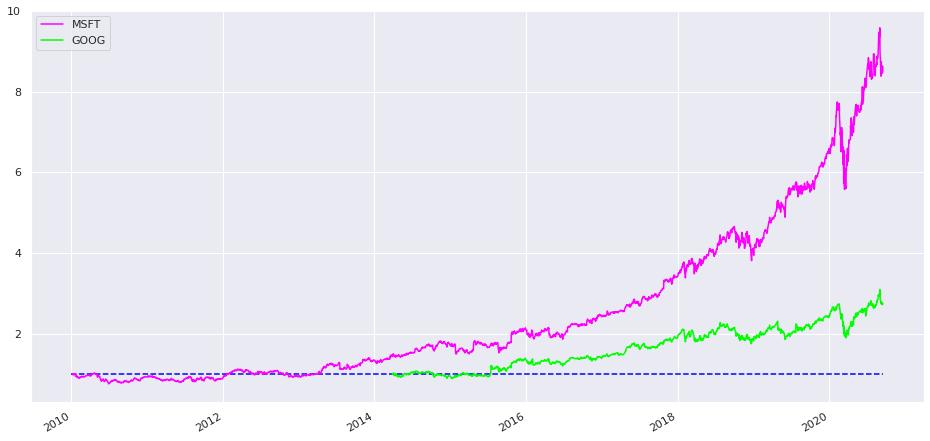

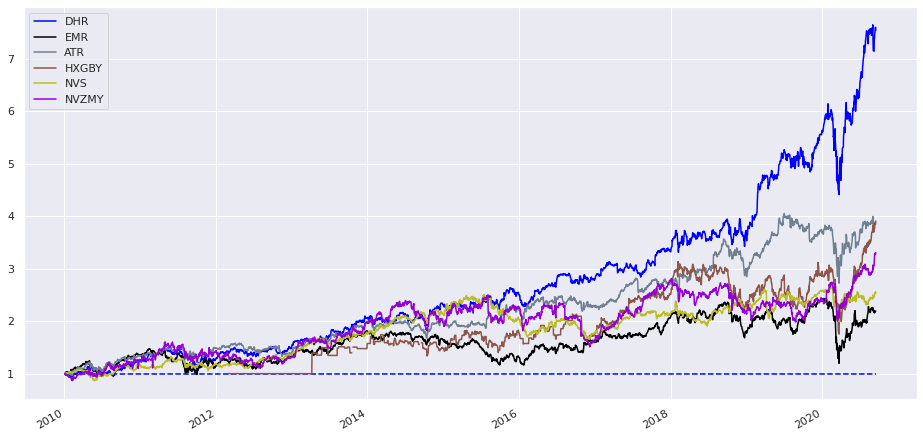

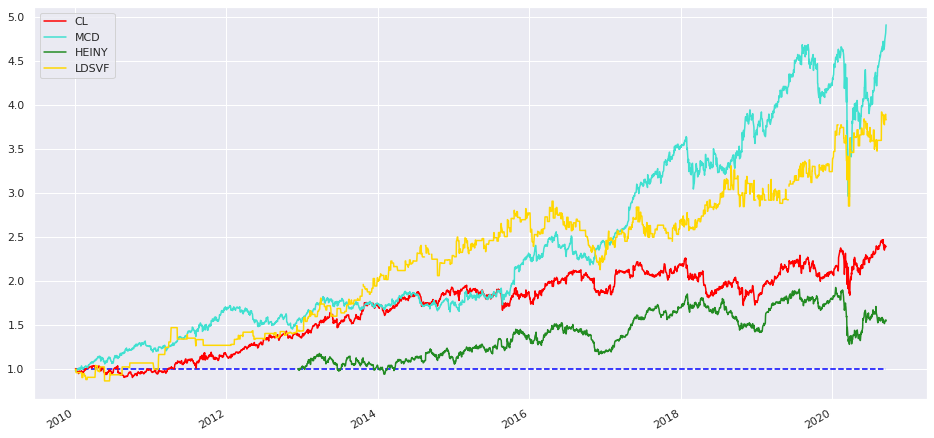

In [43]:
#tesla['cumRet'].plot(label='Tesla', figsize=(16,8))
#gm['cumRet'].plot(label='gm', figsize=(16,8))
#ford['cumRet'].plot(label='Ford', figsize=(16,8));
import seaborn as sns 
sns.set()
#sns.reset_orig



#plt.figure()



color_list = [color_dict.get(x, _) for x in pf.columns]
df_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgray')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.25', color='gray')


color_list = [color_dict.get(x, _) for x in pf1.columns]
df_cum_returns[['MSFT','GOOG']].plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);


color_list = [color_dict.get(x, _) for x in pf2.columns]
df2_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in pf3.columns]
df3_cum_returns.plot(label='Acum.Returns',color=color_list,figsize=(16,8))
plt.hlines(1, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);



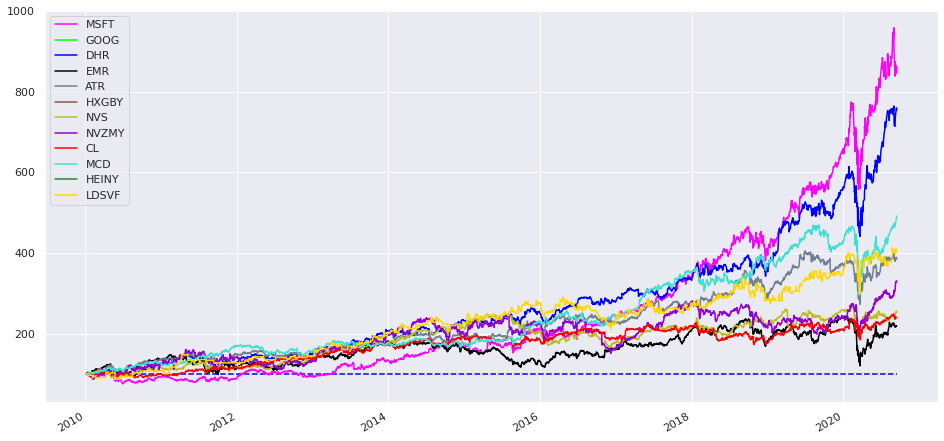

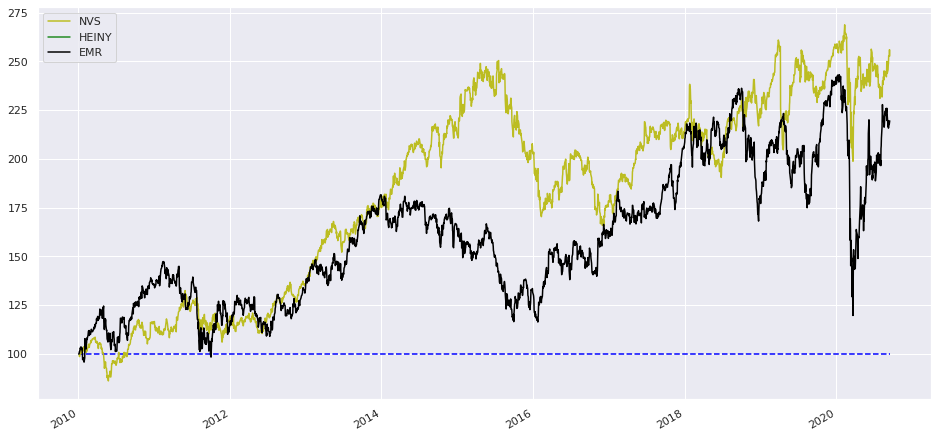

In [44]:
color_list = [color_dict.get(x, _) for x in pf.columns]
(pf / pf.iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

color_list = [color_dict.get(x, _) for x in ['NVS','HEINY','EMR']]
(pf[['NVS','HEINY','EMR']] / pf[['NVS','HEINY','EMR']].iloc[0] * 100).plot(color=color_list,figsize=(16, 8))
plt.hlines(100, startd,endd,colors='blue', linestyles='--')
plt.legend(loc=2);

                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-05  0.000323   NaN -0.001198  0.001614 -0.001104    NaN -0.000951   
2010-01-06 -0.006138   NaN  0.001866  0.008984  0.015194    NaN -0.003613   
2010-01-07 -0.010337   NaN  0.008245  0.000000  0.000000    NaN -0.008784   
2010-01-08  0.006833   NaN  0.013977  0.005706  0.000815    NaN  0.008089   

               NVZMY        CL       MCD  HEINY     LDSVF  
2010-01-04       NaN       NaN       NaN    NaN       NaN  
2010-01-05  0.004066  0.008089 -0.007645    NaN -0.008482  
2010-01-06 -0.026532 -0.002275 -0.013643    NaN  0.008555  
2010-01-07  0.011547 -0.003961  0.007321    NaN  0.000000  
2010-01-08 -0.017806 -0.017953 -0.000969    NaN -0.038393  
_____________
                MSFT  GOOG       DHR       EMR       ATR  HXGBY       NVS  \
2010-01-04       NaN   NaN       NaN       NaN       NaN    NaN       NaN   
2010-01-0

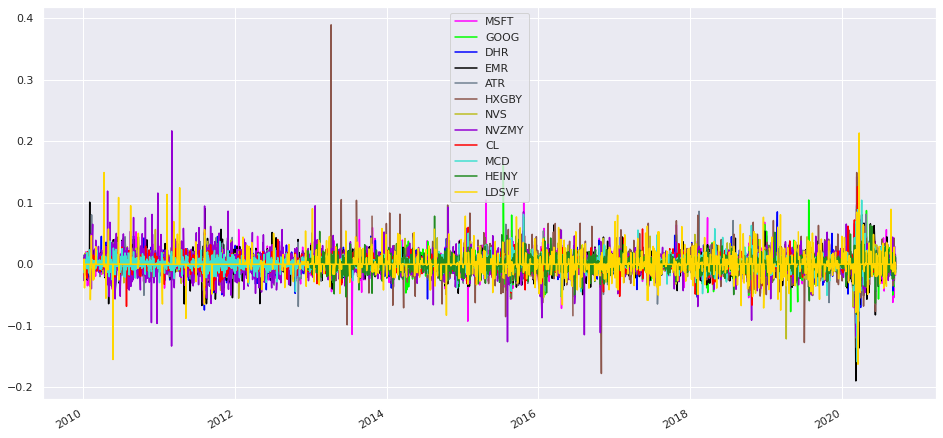

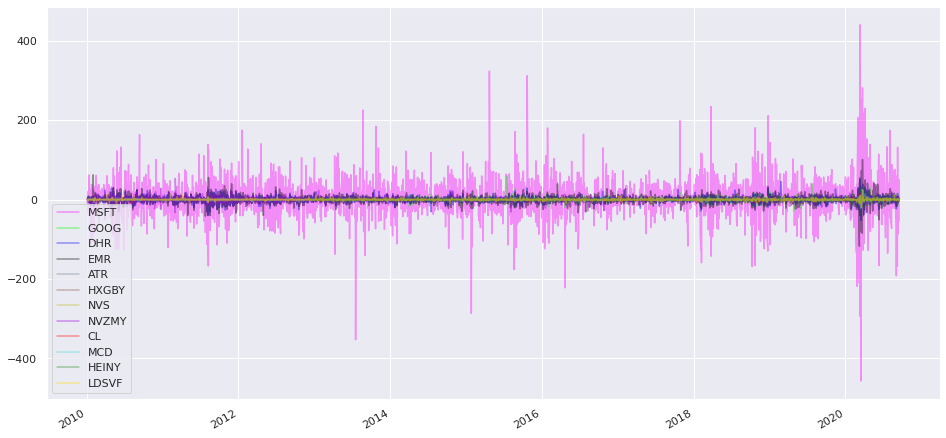

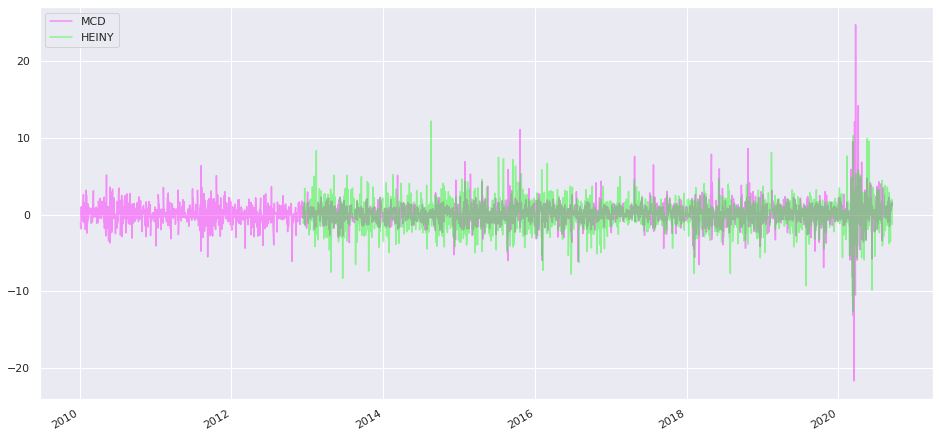

In [45]:
print(df_returns.head())
#sns.reset_orig()
df_returns_aux = determine_earliest_notation(df_returns)

print('_____________')
print(df_returns.head())

color_list = [color_dict.get(x, _) for x in pf.columns]

df_returns.plot(color=color_list, figsize=(16,8))
(df_returns / df_returns_aux).plot(color=color_list,figsize=(16,8), alpha=0.4);

color_list_aux = [color_dict.get(x, _) for x in ['MCD','HEINY']]
(df_returns[['MCD','HEINY']] / df_returns_aux[['MCD','HEINY']]).plot(color=color_list,figsize=(16,8), alpha=0.4);

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!